In [ ]:
X = tfidf
y = df['label'].astype(int)

# **Model Building**

In [ ]:
from sklearn.model_selection import train_test_split # Import the train_test_split function from sklearn.model_selection

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


## MLP


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize MLP Classifier
clf_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
clf_mlp.fit(X_train, y_train)

# Predict on test data
y_pred_mlp = clf_mlp.predict(X_test)

# Evaluate
print(clf_mlp.score(X_train, y_train))
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


0.9910795557982888
MLP Accuracy: 0.8776847469967237
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1592
           1       0.85      0.86      0.86      1155

    accuracy                           0.88      2747
   macro avg       0.87      0.88      0.87      2747
weighted avg       0.88      0.88      0.88      2747



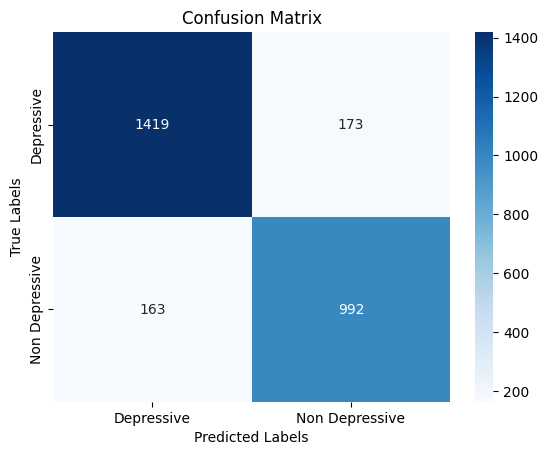

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)

# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Depressive", "Non Depressive"], yticklabels=["Depressive", "Non Depressive"])

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Display the plot
plt.show()

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize Decision Tree Classifier
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)

# Predict on test data
y_pred_tree = clf_tree.predict(X_test)

# Evaluate
print(clf_tree.score(X_train, y_train))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

0.9949026033133078
Decision Tree Accuracy: 0.8693119767018566
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1592
           1       0.84      0.86      0.85      1155

    accuracy                           0.87      2747
   macro avg       0.87      0.87      0.87      2747
weighted avg       0.87      0.87      0.87      2747



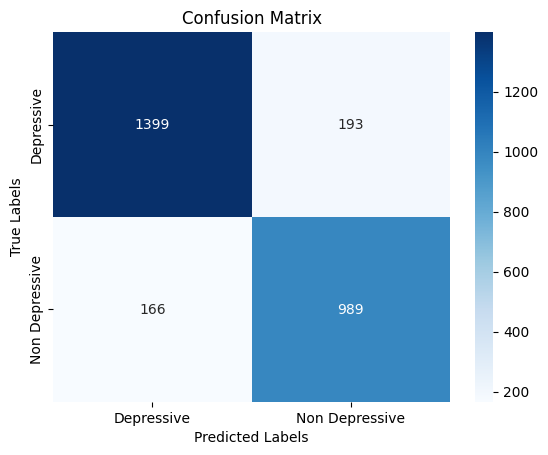

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_tree)

# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Depressive", "Non Depressive"], yticklabels=["Depressive", "Non Depressive"])

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Display the plot
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize Random Forest Classifier
clf_rf = RandomForestClassifier(max_depth= None, n_estimators=500, random_state=42)
clf_rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = clf_rf.predict(X_test)

# Evaluate
print(clf_rf.score(X_train, y_train))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


0.9949026033133078
Random Forest Accuracy: 0.9078995267564616
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1592
           1       0.91      0.87      0.89      1155

    accuracy                           0.91      2747
   macro avg       0.91      0.90      0.90      2747
weighted avg       0.91      0.91      0.91      2747



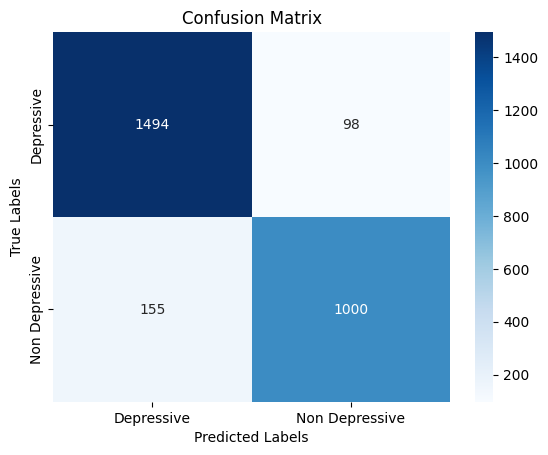

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Depressive", "Non Depressive"], yticklabels=["Depressive", "Non Depressive"])

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Display the plot
plt.show()

## Saving Feature extracted and model file

In [ ]:
import pickle

In [ ]:
with open('tfidf.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)

In [ ]:
# Save the trained RF model to a .pkl file
with open('RF_model.pkl', 'wb') as model_file:
    pickle.dump(clf_rf, model_file)

In [ ]:
!pip install gensim==4.2.0
!pip install scikit-learn==1.5.2
!pip install scipy==1.14.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 62.4 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.3
    Uninstalling gensim-4.3.3:
      Successfully uninstalled gensim-4.3.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import pandas as pd
import pickle
import nltk
import string
import pandas as pd
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns


df=pd.read_csv("/content/drive/MyDrive/depression/send/preprocessedsec.csv")

processed_messages= df['processed_messages'].astype(str).tolist()

# Sample input text
sample=input(" enter input text")

# Preprocess the input text
def preprocess_input_text(sample):
    stemmer = PorterStemmer()

    # Define the list of extended stopwords
    extended_stopwords = nltk.corpus.stopwords.words("english")
    other_exclusions = ["#ff", "ff", "rt"]
    extended_stopwords.extend(other_exclusions)

    # Preprocessing steps
    # Step 1: Removal of extra spaces
    tweet_space = re.sub(r'\s+', ' ', sample)

    # Step 2: Removal of @name[mention]
    tweet_name = re.sub(r'@[\w\-]+', '', tweet_space)

    # Step 3: Removal of links [https://abc.com]
    tweet_no_links = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', tweet_name)

    # Step 4: Removal of punctuations and numbers
    tweet_no_punctuation = re.sub("[^a-zA-Z]", " ", tweet_no_links)

    # Step 5: Remove leading and trailing whitespace
    tweet_stripped = tweet_no_punctuation.strip()

    # Step 6: Replace normal numbers with 'numbr'
    tweet_no_numbers = re.sub(r'\d+(\.\d+)?', 'numbr', tweet_stripped)

    # Step 7: Convert to lowercase
    tweet_lower = tweet_no_numbers.lower()

    # Step 8: Tokenize
    tokenized_tweet = tweet_lower.split()

    # Step 9: Remove stopwords and stem the tokens
    tokenized_tweet = [stemmer.stem(token) for token in tokenized_tweet if token not in extended_stopwords]

    # Step 10: Join the tokens back into a string
    processed_input_text = ' '.join(tokenized_tweet)

    return processed_input_text

# Preprocess the input text
processed_input_text = preprocess_input_text(sample)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.75, min_df=5, max_features=10000)

# Fit the TF-IDF vectorizer on your dataset
tfidf = tfidf_vectorizer.fit_transform(processed_messages)  # Assuming processed_messages is your preprocessed dataset

# Transform the processed input text
tfidf_sample = tfidf_vectorizer.transform([processed_input_text])

with open('/content/drive/MyDrive/depression/send/RF_model.pkl', 'rb') as model_file:
    rf = pickle.load(model_file)

# Make predictions
predicted_label = rf.predict(tfidf_sample)[0]

# Map class labels to their meanings
class_labels = {
    0: "Non Depressive",
    1: "Depressive"
}

# Get the label for the predicted class
predicted_label_text = class_labels[predicted_label]

# Print the result
print("Input Text:", sample)
print("Predicted Label:", predicted_label_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


 enter input textI’m exhausted from pretending to be okay when all I want to do is disappear for a while.
Input Text: I’m exhausted from pretending to be okay when all I want to do is disappear for a while.
Predicted Label: Depressive
